# Project Extension 1: Gaussian Mixture Model 

Shortly after officially finishing my capstone I came across the idea of using a Gaussian mixture model as an unsupervised learning technique that would allow me to cluster data. In the primary project I used a KMeans model model to achieve my desired clustering. According to the sklearn documentation:  

>"A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians."  

More simply put GMMs are probabilistic models that use a soft clustering approach for distributing the points in different clusters. KMeans only considers the mean to update the centroid while GMM takes into account the mean as well as the variance of the data. 

This notebook contains an exploration of gaussian mixture models using the same science standards corpora.  

In [32]:
#custom functions 
from projectfunctions import * 

In [40]:
import pandas as pd 
import pickle  
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
from sklearn.datasets import make_blobs  
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity   
from sklearn import mixture

# Basic Practice  
An exploration of GMM using generated blobs

In [14]:
#make blobs
X, y = make_blobs(n_samples=400, centers=3, cluster_std=0.60, 
                 random_state=42)

In [15]:
#fit a Gaussian Mixture model on blobs 
test_model= mixture.GaussianMixture(n_components=3, covariance_type='full', 
                                   random_state=42)
test_gmm = test_model.fit(X)
test_labels = test_gmm.predict(X) 

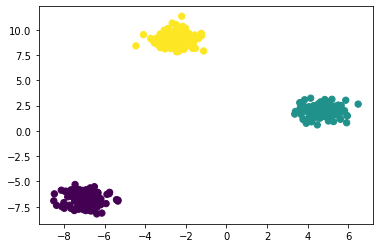

In [16]:
#plot 
plt.scatter(X[:, 0], X[:, 1], c=test_labels, s=40, cmap='viridis')

# GMM Text Data Application 
A direct application of GMM on state standards corpi

In [33]:
#alaska corpus 
alaska = open_and_flatten('TXTfiles/alaska')  
alaska

['dept',
 'education',
 'early',
 'development',
 'board',
 'education',
 'early',
 'development',
 'james',
 'fields',
 'chair',
 'reaa',
 'representative',
 'dr',
 'keith',
 'hamilton',
 'first',
 'vice',
 'chair',
 'public',
 'large',
 'lorri',
 'van',
 'diest',
 'second',
 'vice',
 'chair',
 'third',
 'judicial',
 'district',
 'sally',
 'stockhausen',
 'public',
 'first',
 'judicial',
 'district',
 'tiffany',
 'scott',
 'public',
 'second',
 'judicial',
 'district',
 'sandy',
 'kowalski',
 'public',
 'fourth',
 'judicial',
 'district',
 'bob',
 'griffin',
 'public',
 'large',
 'lt',
 'colonel',
 'jeremiah',
 'hammill',
 'military',
 'advisor',
 'tannis',
 'lorring',
 'student',
 'advisor',
 'additional',
 'information',
 'write',
 'department',
 'education',
 'early',
 'development',
 'po',
 'box',
 'juneau',
 'call',
 'visit',
 'website',
 'http',
 'education',
 'gov',
 'introduction',
 'development',
 'process',
 'relation',
 'ngss',
 'read',
 'framework',
 'vision',
 'system',
 

In [38]:
#define vectorizer parameters
alaska_tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, 
                                   ngram_range=(1,3))

tfidf_matrix_alaska = alaska_tfidf_vectorizer.fit_transform(alaska)

In [42]:
#shape 
tfidf_matrix_alaska.shape

(42525, 3150)

In [39]:
#terms and 
alaska_terms = tfidf_vectorizer.get_feature_names() 
alaska_dist = 1 - cosine_similarity(tfidf_matrix_alaska) 

In [45]:
#create a dense array 
alaska_dense_matrix = tfidf_matrix_alaska.toarray()

In [49]:
#fit GMM Model
alaska_model = mixture.GaussianMixture(covariance_type='full')  
alaska_gmm = alaska_model.fit(alaska_dense_matrix)
alaska_labels = alaska_gmm.predict(alaska_dense_matrix)

In [52]:
#Utilize the statistical 
alaska_probs = alaska_gmm.predict_proba(alaska_dense_matrix)
print(probs[:30].round(3))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


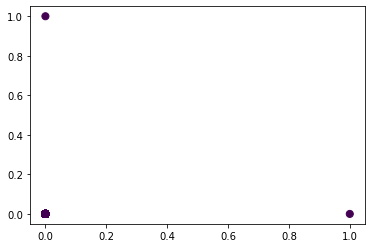

In [54]:
size = 50 * alaska_probs.max(1) ** 2  # square emphasizes differences
plt.scatter(alaska_dense_matrix[:, 0], alaska_dense_matrix[:, 1],
            c=alaska_labels, cmap='viridis', s=size);

# All Texts

In [30]:
#import text data
df = pickle.load( open( "Pickles/standards_corpi.pkl", "rb" ) ) 
df.drop(df.tail(1).index,inplace=True) 

In [3]:
#set features & labels to list
corpi_list = df['corpus'].values.tolist() 
state_list = df['state'].values.tolist()

Text data needs to be prepared in the same way it was for KMeans model by vectorizing the terms. This data was already cleaned and tokenized prior to pickling so I am choosing not to apply additional processing for the moment but that could be revisited & refined.

In [5]:
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(corpi_list)

In [6]:
tfidf_matrix.shape

(30, 22482)

In [7]:
#values needed later for kmeans 
terms = tfidf_vectorizer.get_feature_names() 
dist = 1 - cosine_similarity(tfidf_matrix) 

In the original KMeans project the clusters produced were elliptically than spherically shaped (as reproduced below) and at least one point was clustered in a different than the points located directly next to it. The data produced a non circular grouping and thus circular groupings were a poor fit. The main problem with KMeans then becomes there is no way to determine the probability that a specific data point will fall within one or a different cluster. With a Gaussian Mixture Model there is the possibility to finding the probability that a point will fall within a specific cluster. I will apply the same number of groups that I used in the KMeans clusters in the initial model.

The matrix needs to be turned into a dense matrix before being passed into the model.

In [9]:
dense_matrix = tfidf_matrix.toarray()

In [10]:
#fit GMM Model
model = mixture.GaussianMixture(n_components=3, covariance_type='full')  
gmm = model.fit(dense_matrix)
labels = gmm.predict(dense_matrix)

Below is a matrix of the probability that a given point will fall into a specific cluster.

In [11]:
#Utilize the statistical 
probs = gmm.predict_proba(dense_matrix)
print(probs[:30].round(3))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


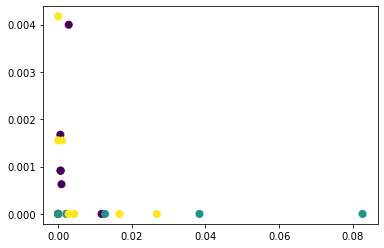

In [12]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(dense_matrix[:, 0], dense_matrix[:, 1], c=labels, cmap='viridis',
            s=size);

Resources: 
* [Sklearn Documentation](chrome-extension://klbibkeccnjlkjkiokjodocebajanakg/suspended.html#ttl=Gaussian%20Mixture%20Model%20Ellipsoids%20%E2%80%94%20scikit-learn%200.24.1%20documentation&pos=620&uri=https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html#sphx-glr-auto-examples-mixture-plot-gmm-py)  
* [Python Data Science](chrome-extension://klbibkeccnjlkjkiokjodocebajanakg/suspended.html#ttl=In%20Depth%3A%20Gaussian%20Mixture%20Models%20%7C%20Python%20Data%20Science%20Handbook&pos=1258&uri=https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html) 
* [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/)